<a href="https://colab.research.google.com/github/LuisHenrique7/TCC_Testes_Agrupamento/blob/main/(Votacao_apenas)Analise_dos_Modelos_de_Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Lendo Conjunto de Dados

In [ ]:
df_votos_deputados = pd.read_csv('/content/drive/MyDrive/TCC II/APP 2/Datasets Gerados/VotacaoDosDeputados(23_03_23).csv')
df_votos_deputados

,id_deputado,nome,siglaPartido,siglaUf,Votacao 2301683-33,Votacao 2350702-8,Votacao 2350706-6,Votacao 2351332-7
0,220593,Abilio Brunini,PL,MT,Sim,Sim,Vazio,Não
1,204379,Acácio Favacho,MDB,AP,Não,Sim,Sim,Vazio
2,220714,Adail Filho,REPUBLICANOS,AM,Vazio,Sim,Não,Sim
3,221328,Adilson Barroso,PL,SP,Vazio,Sim,Vazio,Sim
4,204560,Adolfo Viana,PSDB,BA,Vazio,Vazio,Vazio,Vazio
...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,SOLIDARIEDADE,MG,Não,Sim,Sim,Sim
509,220558,Zé Trovão,PL,SC,Sim,Sim,Não,Não
510,204517,Zé Vitor,PL,MG,Vazio,Vazio,Sim,Sim
511,160592,Zeca Dirceu,PT,PR,Vazio,Vazio,Vazio,Sim


In [ ]:
df_proposicoes_temas_deputados = pd.read_json('/content/drive/MyDrive/TCC II/APP 2/Datasets Gerados/TemaProposicaoDosDeputados.json')
df_proposicoes_temas_deputados.columns = ['id_deputado', 'nome',	'proposicoes',	'temas_proposicoes']
df_proposicoes_temas_deputados

,id_deputado,nome,proposicoes,temas_proposicoes
0,220593,Abilio Brunini,"[2352557, 2352553, 2352549, 2352547, 2352524, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
1,204379,Acácio Favacho,"[2352547, 2352545, 2352541, 2352476, 2352473, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
2,220714,Adail Filho,"[2352559, 2352556, 2352549, 2352548, 2352547, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
3,221328,Adilson Barroso,"[2352062, 2352046, 2351960, 2351680, 2351620, ...","[Sem tema, Sem tema, Sem tema, [Direito Penal ..."
4,204560,Adolfo Viana,"[2352559, 2352547, 2352545, 2352514, 2352501, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
...,...,...,...,...
508,160632,Zé Silva,"[2352559, 2352557, 2352549, 2352545, 2352473, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
509,220558,Zé Trovão,"[2352549, 2352545, 2352541, 2352524, 2352521, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
510,204517,Zé Vitor,"[2352596, 2352557, 2352556, 2352476, 2352049, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
511,160592,Zeca Dirceu,"[2352556, 2352547, 2352445, 2352444, 2351948, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."


In [ ]:
df_caracteristicas_deputados_geral = pd.merge(df_votos_deputados, df_proposicoes_temas_deputados, left_on='id_deputado', right_on='id_deputado', suffixes=('', '_df_temas'))
df_caracteristicas_deputados_geral

,id_deputado,nome,siglaPartido,siglaUf,Votacao 2301683-33,Votacao 2350702-8,Votacao 2350706-6,Votacao 2351332-7,nome_df_temas,proposicoes,temas_proposicoes
0,220593,Abilio Brunini,PL,MT,Sim,Sim,Vazio,Não,Abilio Brunini,"[2352557, 2352553, 2352549, 2352547, 2352524, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
1,204379,Acácio Favacho,MDB,AP,Não,Sim,Sim,Vazio,Acácio Favacho,"[2352547, 2352545, 2352541, 2352476, 2352473, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
2,220714,Adail Filho,REPUBLICANOS,AM,Vazio,Sim,Não,Sim,Adail Filho,"[2352559, 2352556, 2352549, 2352548, 2352547, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
3,221328,Adilson Barroso,PL,SP,Vazio,Sim,Vazio,Sim,Adilson Barroso,"[2352062, 2352046, 2351960, 2351680, 2351620, ...","[Sem tema, Sem tema, Sem tema, [Direito Penal ..."
4,204560,Adolfo Viana,PSDB,BA,Vazio,Vazio,Vazio,Vazio,Adolfo Viana,"[2352559, 2352547, 2352545, 2352514, 2352501, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
...,...,...,...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,SOLIDARIEDADE,MG,Não,Sim,Sim,Sim,Zé Silva,"[2352559, 2352557, 2352549, 2352545, 2352473, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
509,220558,Zé Trovão,PL,SC,Sim,Sim,Não,Não,Zé Trovão,"[2352549, 2352545, 2352541, 2352524, 2352521, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
510,204517,Zé Vitor,PL,MG,Vazio,Vazio,Sim,Sim,Zé Vitor,"[2352596, 2352557, 2352556, 2352476, 2352049, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
511,160592,Zeca Dirceu,PT,PR,Vazio,Vazio,Vazio,Sim,Zeca Dirceu,"[2352556, 2352547, 2352445, 2352444, 2351948, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."


# Codifica Colunas com características categóricas

## Colunas de votação

In [ ]:
# Votacao 2301683-33	Votacao 2350702-8	Votacao 2350706-6	Votacao 2351332-7

In [ ]:
print(len(df_caracteristicas_deputados_geral['Votacao 2301683-33']))
print(len(df_caracteristicas_deputados_geral['Votacao 2350702-8']))
print(len(df_caracteristicas_deputados_geral['Votacao 2350706-6']))
print(len(df_caracteristicas_deputados_geral['Votacao 2351332-7']))

513
513
513
513


In [ ]:
tipo_voto_codificado = np.concatenate((df_caracteristicas_deputados_geral['Votacao 2301683-33'].values, df_caracteristicas_deputados_geral['Votacao 2350702-8'].values), axis=0)
tipo_voto_codificado = np.concatenate((tipo_voto_codificado, df_caracteristicas_deputados_geral['Votacao 2350706-6'].values), axis=0)
tipo_voto_codificado = np.concatenate((tipo_voto_codificado, df_caracteristicas_deputados_geral['Votacao 2351332-7'].values), axis=0)
tipo_voto_codificado = pd.factorize(tipo_voto_codificado)[0]
print(len(tipo_voto_codificado))
tipo_voto_codificado

2052


array([0, 1, 2, ..., 0, 0, 0])

In [ ]:
n_cols = 4
limite = []

for i in range(len(df_caracteristicas_deputados_geral), n_cols * len(df_caracteristicas_deputados_geral), len(df_caracteristicas_deputados_geral)):
  print(i, end='   ')
  limite.append(i)

513   1026   1539   

In [ ]:
lista_votacao_codificado_2301683_33 = tipo_voto_codificado[:limite[0]]
lista_votacao_codificado_2350702_8 = tipo_voto_codificado[limite[0] : limite[1]]
lista_votacao_codificado_2350706_6 = tipo_voto_codificado[limite[1] : limite[2]]
lista_votacao_codificado_2351332_7 = tipo_voto_codificado[limite[2] : ]

print(len(lista_votacao_codificado_2301683_33))
print(len(lista_votacao_codificado_2350702_8))
print(len(lista_votacao_codificado_2350706_6))
print(len(lista_votacao_codificado_2351332_7))

513
513
513
513


## Coluna Estado e Partido

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['siglaUf']]
dados_para_codificar

,siglaUf
0,MT
1,AP
2,AM
3,SP
4,BA
...,...
508,MG
509,SC
510,MG
511,PR


In [ ]:
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
uf_codificado = enc.transform(dados_para_codificar).toarray()
print(uf_codificado.shape)
uf_codificado

(513, 27)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
uf_codificado = pd.factorize(np.ravel(dados_para_codificar.values))[0]
uf_codificado

array([ 0,  1,  2,  3,  4,  3,  5,  6,  7,  7,  8,  9, 10, 11,  3, 12,  7,
        3,  3,  4, 13,  3,  7,  3, 14,  4, 15, 16, 17,  0, 17, 18,  2,  6,
       19,  6, 10, 20, 10, 17,  6,  9, 21, 13,  4,  3,  9,  7,  3,  3, 14,
        4,  2, 22, 20,  1, 16,  4,  3, 16, 16, 16, 23, 24, 15, 15, 11,  7,
        7,  6,  3,  8, 24,  2,  4,  3,  3, 19,  7, 13, 16,  3, 20,  3, 15,
       19, 22,  6,  5, 10,  3,  9,  3,  4, 16, 16, 16, 20,  4, 17, 20, 19,
        0, 25,  0, 20,  3, 21,  7, 25, 18, 24,  7,  4,  8,  6, 16,  5,  4,
       14, 19, 16,  7, 19, 10,  7,  3, 10, 12,  5,  6, 26,  9,  3,  9, 14,
        6, 15,  3,  3, 16, 15,  7, 17,  6,  4, 15, 15,  9,  6, 16, 10,  6,
        1, 17, 25, 22,  6, 10, 24, 18,  5,  9, 17, 12,  6, 10,  3, 20, 21,
        9, 13,  4,  0,  6, 15, 20,  3, 11,  6,  6, 10, 18,  0, 17, 26, 19,
        3,  3,  2,  3, 20, 15,  4,  7, 10, 20, 23, 20, 20, 15, 13,  5, 22,
       22,  7,  6, 11,  4, 23, 16, 19, 15, 24, 21,  8, 15,  6,  3, 18, 19,
       18, 11,  7, 16,  5

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['siglaPartido']]
dados_para_codificar

,siglaPartido
0,PL
1,MDB
2,REPUBLICANOS
3,PL
4,PSDB
...,...
508,SOLIDARIEDADE
509,PL
510,PL
511,PT


In [ ]:
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
partido_codificado = enc.transform(dados_para_codificar).toarray()
print(partido_codificado.shape)
partido_codificado

(513, 22)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
partido_codificado = pd.factorize(np.ravel(dados_para_codificar.values))[0]
partido_codificado

array([ 0,  1,  2,  0,  3,  4,  5,  3,  5,  6,  5,  7,  5,  0,  1,  2,  1,
        7,  8,  2,  2,  9,  7,  7,  9, 10, 11,  0, 12,  0,  5,  2,  8,  5,
        7,  7,  0,  0,  6,  5, 13,  1,  2,  2, 14,  0,  1,  8,  7,  8,  5,
        9, 14,  5,  2,  1, 15, 11,  1, 16,  5,  7,  9,  3, 14,  3,  0,  0,
        7, 13, 17,  0,  7,  0,  0,  0,  0,  1,  2,  9,  0,  3,  7,  7,  7,
        0, 14, 18,  1, 14,  2,  9, 14, 14, 18,  9,  0,  5,  5,  2, 11,  1,
        9,  0,  0,  0,  5,  9,  5,  9,  5,  3, 10,  9,  9,  7,  9,  0, 10,
        5,  0, 14,  3,  0,  9, 14,  9,  9,  2,  7, 13, 14,  0,  5,  0,  5,
        9,  9,  1,  0,  0, 17,  7,  0, 14, 14,  2,  5,  7,  5,  7, 14,  0,
        6,  9,  9,  7, 19,  0,  5, 17,  9,  1, 16,  1,  6,  6,  0,  5,  9,
        1,  0,  9,  1,  0,  7, 16, 18,  7,  0,  2,  1,  5,  9, 17, 14,  9,
        1,  5,  9,  9, 16,  9,  6, 18,  9,  9,  7,  5,  0,  0,  0,  6,  7,
        7,  2, 19,  2, 14,  0,  0,  3,  9,  3,  5, 16,  0,  2, 12, 17,  4,
        0,  2,  0, 18, 12

## Coluna proposições

In [ ]:
for i in df_caracteristicas_deputados_geral.index:
  df_caracteristicas_deputados_geral['proposicoes'][i].sort()

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['proposicoes']]
dados_para_codificar

,proposicoes
0,"[2346923, 2347272, 2348353, 2348760, 2348794, ..."
1,"[2345611, 2347180, 2347316, 2348698, 2348760, ..."
2,"[2345725, 2346749, 2346783, 2347016, 2348209, ..."
3,"[2348360, 2348794, 2348805, 2348861, 2349027, ..."
4,"[2345598, 2345609, 2347226, 2347227, 2348622, ..."
...,...
508,"[2347098, 2348209, 2348339, 2348794, 2348803, ..."
509,"[2347272, 2348794, 2348845, 2348860, 2348861, ..."
510,"[2345680, 2347272, 2348209, 2348336, 2348376, ..."
511,"[2345502, 2345614, 2345615, 2347219, 2347224, ..."


In [ ]:
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
proposicoes_codificado = enc.transform(dados_para_codificar).toarray()
print(proposicoes_codificado.shape)
proposicoes_codificado

TypeError: ignored

# Seleciona dados para o treinamento

In [ ]:
df_caracteristicas_selecionadas_deputados = df_caracteristicas_deputados_geral.iloc[: , [0,1]]

# df_caracteristicas_selecionadas_deputados['partido'] = partido_codificado.tolist()
# df_caracteristicas_selecionadas_deputados['estado'] = uf_codificado.tolist()
df_caracteristicas_selecionadas_deputados['Votacao 2301683_33'] = lista_votacao_codificado_2301683_33
df_caracteristicas_selecionadas_deputados['Votacao 2350702_8'] = lista_votacao_codificado_2350702_8
df_caracteristicas_selecionadas_deputados['Votacao 2350706_6'] = lista_votacao_codificado_2350706_6
df_caracteristicas_selecionadas_deputados['Votacao 2351332_7'] = lista_votacao_codificado_2351332_7

df_caracteristicas_selecionadas_deputados

<ipython-input-43-1d198d0d1a2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caracteristicas_selecionadas_deputados['Votacao 2301683_33'] = lista_votacao_codificado_2301683_33
<ipython-input-43-1d198d0d1a2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caracteristicas_selecionadas_deputados['Votacao 2350702_8'] = lista_votacao_codificado_2350702_8
<ipython-input-43-1d198d0d1a2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7
0,220593,Abilio Brunini,0,0,2,1
1,204379,Acácio Favacho,1,0,0,2
2,220714,Adail Filho,2,0,1,0
3,221328,Adilson Barroso,2,0,2,0
4,204560,Adolfo Viana,2,2,2,2
...,...,...,...,...,...,...
508,160632,Zé Silva,1,0,0,0
509,220558,Zé Trovão,0,0,1,1
510,204517,Zé Vitor,2,2,0,0
511,160592,Zeca Dirceu,2,2,2,0


# Ajustando características multidimensionais

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
print(X.shape)
X

(513, 6)


array([[list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        0, 0, 2, 1],
       [list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        1, 0, 0, 2],
       [list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]),
        list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        2, 0, 1, 0],
       ...,
       [list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
for i in X:
  i[0] = np.array(i[0])
  i[1] = np.array(i[1])

In [ ]:
X.ravel()

array([array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0.])                                               ,
       array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
       0, ..., 0, 2, 0], dtype=object)

In [ ]:
X = X.ravel().reshape(len(df_caracteristicas_selecionadas_deputados), -1)
print(X.shape)
X

(513, 6)


array([[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0.])                                               ,
        array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
        0, 0, 2, 1],
       [array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0.])                                               ,
        array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
        1, 0, 0, 2],
       [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 1., 0., 0.])                                               ,
        array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0

In [ ]:
df_caracteristicas_selecionadas_deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 512
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_deputado         513 non-null    int64 
 1   nome                513 non-null    object
 2   partido             513 non-null    int64 
 3   estado              513 non-null    int64 
 4   Votacao 2301683_33  513 non-null    int64 
 5   Votacao 2350702_8   513 non-null    int64 
 6   Votacao 2350706_6   513 non-null    int64 
 7   Votacao 2351332_7   513 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 36.1+ KB


# Usando MeanShift

In [ ]:
# The following bandwidth can be automatically detected using
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:]

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 2
Silhouette Coefficient: 0.435


In [ ]:
# print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
# print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
# print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
# print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
# print(
#     "Adjusted Mutual Information:"
#     f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
# )
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

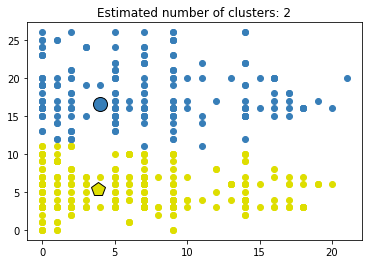

In [ ]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
markers = ["p", "o", "^", '*', 's']

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 0], df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 1], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# KMeans

Silhouette Coefficient: 0.430


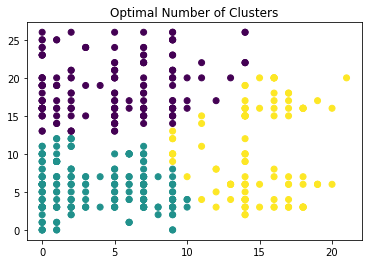

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

k_means = KMeans(n_clusters=3, **common_params)
k_means.fit(X)
labels = k_means.labels_

print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

y_pred = k_means.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

In [ ]:
pca = PCA(n_components=2).fit_transform(X)
pca

array([[-11.1469007 ,  -5.88303758],
       [-10.08123508,  -4.88899772],
       [ -9.02213225,  -3.94860671],
       ...,
       [ -5.13623434,  -6.10242436],
       [  4.22155846,   0.31651206],
       [ 10.10792739,  -2.02388961]])

Silhouette Coefficient: 0.409


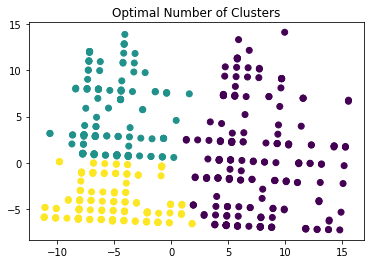

In [ ]:
X = pca

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}


k_means = KMeans(n_clusters=3, **common_params)
k_means.fit(X)
labels = k_means.labels_

print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

y_pred = k_means.predict(X)
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

# DBSCAN

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:]

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

db = DBSCAN(eps=0.5, min_samples=200).fit(X)
labels = db.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 1


ValueError: ignored

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values

db = DBSCAN(eps=0.3, min_samples=200).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 0
Estimated number of noise points: 513


In [ ]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
markers = ["p", "o", "^", '*', 's']

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 0], df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 1], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Nova seção

## KMeans

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X.shape

(513, 4)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.367

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.386

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.407

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.402

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.406

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.417

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.386

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.414

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.367

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.389

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.413

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.413

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 90, 'silhouette': 0.5135897828998985}

Best Silhouette Coefficient: 0.514




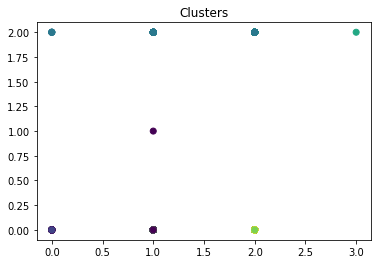

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.475

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.529

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.475

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.529

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.483

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.484

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.529

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.544

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.484

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.529

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.529

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.529

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.475

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.529

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.529

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 6, 'random_state': 150, 'silhouette': 0.6867940624497076}

Best Silhouette Coefficient: 0.687




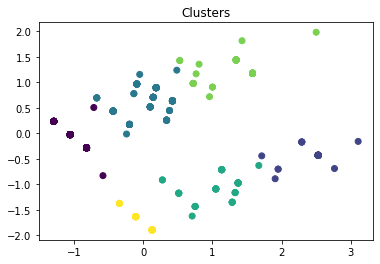

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## Usando MeanShift

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X.shape

(513, 4)

In [ ]:
[print(q/10, s) for q in range(0, 11) for s in range(100, 201, 50)]

0.0 100
0.0 150
0.0 200
0.1 100
0.1 150
0.1 200
0.2 100
0.2 150
0.2 200
0.3 100
0.3 150
0.3 200
0.4 100
0.4 150
0.4 200
0.5 100
0.5 150
0.5 200
0.6 100
0.6 150
0.6 200
0.7 100
0.7 150
0.7 200
0.8 100
0.8 150
0.8 200
0.9 100
0.9 150
0.9 200
1.0 100
1.0 150
1.0 200


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
list_estimate_bandwidth = [estimate_bandwidth(X, quantile=q/10, n_samples=s) for q in range(1, 11) for s in range(100, 201, 50)]
list_estimate_bandwidth

[4.564931783136794,
 4.732176582875352,
 4.723476306201684,
 6.598807593048657,
 6.792260687178645,
 6.84110924501022,
 8.507680182621474,
 8.57742062048096,
 8.596729529729972,
 10.21644455970201,
 10.306954980717638,
 10.293780802013494,
 11.859086179101144,
 12.125871602347358,
 12.116763178842437,
 13.31308666361367,
 13.635659767522084,
 13.665326092194345,
 14.85104901269833,
 15.040312220642058,
 15.145193701412753,
 16.512722125884956,
 16.674544791088636,
 16.715633490191607,
 18.56336283927084,
 18.676218433882884,
 18.681280706340335,
 22.932098314777512,
 23.18058323918126,
 23.228651916423363]

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 1.1053980769303735, quantile = 1, n_samples = 100
number of estimated clusters : 12
Silhouette Coefficient: 0.568


bandwidth = 0.9188936762564716, quantile = 1, n_samples = 150
number of estimated clusters : 49
Silhouette Coefficient: 0.969


bandwidth = 0.927808751736342, quantile = 1, n_samples = 200
number of estimated clusters : 49
Silhouette Coefficient: 0.969


bandwidth = 1.2592872294835604, quantile = 2, n_samples = 100
number of estimated clusters : 9
Silhouette Coefficient: 0.496


bandwidth = 1.5190030767082525, quantile = 2, n_samples = 150
number of estimated clusters : 6
Silhouette Coefficient: 0.453


bandwidth = 1.4895609017347022, quantile = 2, n_samples = 200
number of estimated clusters : 7
Silhouette Coefficient: 0.500


bandwidth = 1.6291076522766303, quantile = 3, n_samples = 100
number of estimated clusters : 6
Silhouette Coefficient: 0.443


bandwidth = 1.7192256502488643, quantile = 3, n_samples = 150
number of estimated clusters : 3
Silhouette Coe

In [ ]:
best_model

{'quantile': 1,
 'n_samples': 150,
 'labels': array([31, 14, 10,  5,  2,  4,  7,  6,  6,  0, 22,  0, 14, 12,  9, 23, 15,
        41,  1,  0,  3,  0,  8,  7,  4, 14,  8,  2, 10, 12,  9, 10, 32,  0,
        17,  0, 13, 10,  0,  8,  0, 15,  8, 20,  6, 10, 15,  4,  7,  1, 33,
         9,  2,  8, 10,  5, 17, 14, 15,  0,  1,  0,  0, 11,  5,  0, 26,  3,
         0, 11,  4,  5, 14, 12, 19, 31, 25, 16,  3,  0, 12,  4,  7,  1,  7,
        12,  0,  1,  0,  8, 40, 22,  0,  0,  0,  0, 12,  0,  9,  0,  0,  5,
         0,  3,  3, 13,  8,  8, 32,  1,  1, 11,  0,  9,  5,  1,  9,  1, 16,
         2, 38,  9,  4, 13,  4,  2, 42,  4,  3,  7,  1,  0, 29, 14, 19,  1,
         0,  0,  0, 25, 10,  4,  5,  2,  2,  1, 47,  1,  0,  0,  0, 14,  2,
         0,  1,  1,  5, 30,  7,  0,  7,  0,  6,  6,  1,  6,  0, 12, 18,  1,
         1, 20, 22,  0,  1,  2,  1,  6,  1,  3, 15,  5, 27,  1,  6,  9,  1,
        16,  0, 46,  1,  0,  1, 11,  6,  6, 18,  0,  6, 39, 26, 19,  4,  0,
         0, 24, 17,  3,  0,  3, 25,  4,  7,

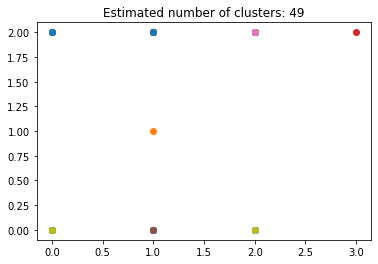

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X[my_members, 0], X[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
for bandwidth in list_estimate_bandwidth:
  mean_shift = MeanShift(bandwidth=bandwidth)
  mean_shift.fit(X)
  labels = mean_shift.labels_
  cluster_centers = mean_shift.cluster_centers_

  labels_unique = np.unique(labels)
  n_clusters_ = len(labels_unique)

  try:
    print('bandwidth =', bandwidth)
    print("number of estimated clusters : %d" % n_clusters_)
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}\n\n")
  except:
    next

bandwidth = 4.564931783136794
number of estimated clusters : 6
Silhouette Coefficient: 0.342


bandwidth = 4.732176582875352
number of estimated clusters : 6
Silhouette Coefficient: 0.372


bandwidth = 4.723476306201684
number of estimated clusters : 6
Silhouette Coefficient: 0.372


bandwidth = 6.598807593048657
number of estimated clusters : 2
Silhouette Coefficient: 0.410


bandwidth = 6.792260687178645
number of estimated clusters : 2
Silhouette Coefficient: 0.392


bandwidth = 6.84110924501022
number of estimated clusters : 2
Silhouette Coefficient: 0.431


bandwidth = 8.507680182621474
number of estimated clusters : 1
bandwidth = 8.57742062048096
number of estimated clusters : 1
bandwidth = 8.596729529729972
number of estimated clusters : 1
bandwidth = 10.21644455970201
number of estimated clusters : 1
bandwidth = 10.306954980717638
number of estimated clusters : 1
bandwidth = 10.293780802013494
number of estimated clusters : 1
bandwidth = 11.859086179101144
number of estimated c

In [ ]:



clustering_model.fit(X)
labels = clustering_model.labels_
cluster_centers = clustering_model.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 2
Silhouette Coefficient: 0.410


In [ ]:
clustering_model

MeanShift(bandwidth=6.598807593048657)

In [ ]:


bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 2
Silhouette Coefficient: 0.435


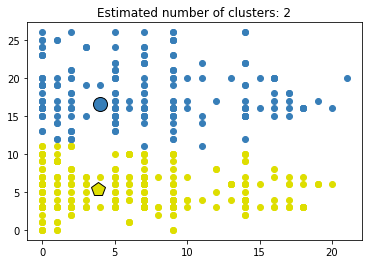

In [ ]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
markers = ["p", "o", "^", '*', 's']

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 0], df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 1], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Nova seção